In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
np.arange(1,2)

array([1])

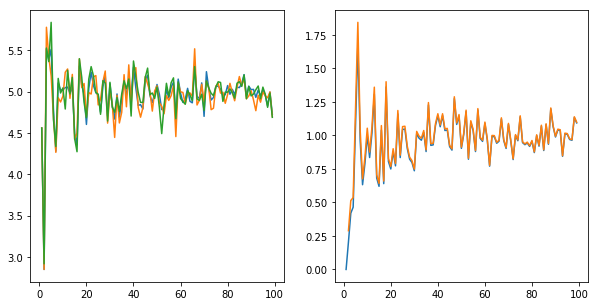

In [116]:
def Y(X):
    i = np.arange(1,X.size+1)
    return np.sum(i*X)/np.sum(i)
Data = pd.DataFrame({"N":[],"mean":[],"median":[],"std":[],"std BC":[],"Y":[]})
for i in np.arange(1,100,1):
    X =np.random.normal(5,1,i)
    Data = Data.append({"N":i,"mean":np.mean(X),"median":np.median(X),"std":np.std(X), 
                        "std BC":np.std(X,ddof=1), "Y":Y(X)}, ignore_index=True)
f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(Data["N"], Data["mean"])
ax[0].plot(Data["N"], Data["median"])
ax[0].plot(Data["N"], Data["Y"])
ax[1].plot(Data["N"], Data["std"])
ax[1].plot(Data["N"], Data["std BC"])

In [117]:
Data = pd.DataFrame({"N":[],"mean":[],"median":[],"std":[],"std BC":[],"Y":[]})
for i in np.arange(1,50,1):
    for j in range(100):
        X =np.random.normal(5,1,i)
        Data = Data.append({"N":i,"mean":np.mean(X),"median":np.median(X),"std":np.std(X), "std BC":np.std(X,ddof=1),"Y":Y(X)}, ignore_index=True)


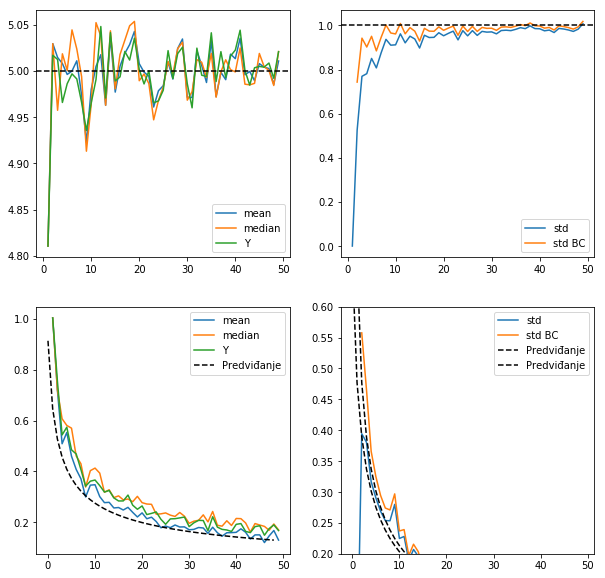

In [119]:
Means = Data.groupby("N").mean()
STDs  = Data.groupby("N").std(ddof= 0)
f, axs = plt.subplots(2,2,figsize=(10,10))
ax = axs[0]
ax[0].plot(Means["mean"])
ax[0].plot(Means["median"])
ax[0].plot(Means["Y"])
ax[0].legend()
ax[1].plot(Means["std"])
ax[1].plot(Means["std BC"])
ax[1].legend()
ax[0].axhline(5,color="k",ls="dashed")
ax[1].axhline(1,color="k",ls="dashed")
ax = axs[1]
ax[0].plot(STDs["mean"])
ax[0].plot(STDs["median"])
ax[0].plot(STDs["Y"])
ax[0].plot(STDs.loc[STDs.index[-1],"mean"]*np.sqrt(STDs.index[-1]/STDs.index),label="Predviđanje",color="k",ls="dashed")
ax[0].legend()
ax[1].plot(STDs["std"])
ax[1].plot(STDs["std BC"])
ax[1].plot(STDs.loc[STDs.index[-1],"std"]*np.sqrt(STDs.index[-1]/STDs.index),label="Predviđanje",color="k",ls="dashed")
ax[1].plot(STDs.loc[STDs.index[-1],"std BC"]*np.sqrt((STDs.index[-1]-1)/(STDs.index-1)),label="Predviđanje",color="k",ls="dashed")
ax[1].set_ylim(0.2,0.6)
ax[1].legend()

In [79]:
STDs.loc[STDs.index[1],"std"]

0.4224889811240069

In [113]:
1/np.sqrt(1000)

0.03162277660168379

In [120]:
X=np.array([1,2,3,4,1000])
np.mean(X)

202.0

In [121]:
np.median(X)

3.0

# Confidence interval

## Poznata varijanca
Prati normalnu distribuciju

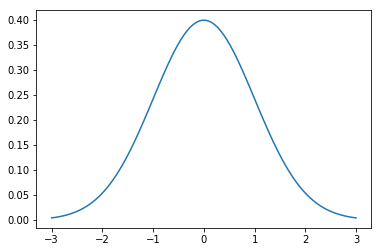

In [265]:
from scipy import stats
plt.plot(np.linspace(-3,3,100),stats.norm.pdf(np.linspace(-3,3,100)))

1000 Mjerenja od $N(1,\sigma=0.5)$ zadajemo s ```np.random.normal(1,0.5,10)```

In [263]:
X = np.random.normal(1,0.5,1000)


$\mu$, $\sigma$, $\sigma/\sqrt{n}$ su

(0.9765443048075039, 0.5159544834492811, 0.016315913366753775)

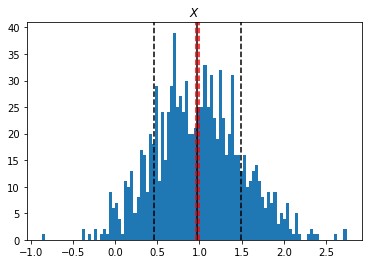

In [189]:
mu    = np.mean(X)
sigma = np.std(X)
plt.hist(X,100);
plt.axvline(mu,color='k')
plt.axvline(mu-sigma,color='k',ls='dashed')
plt.axvline(mu+sigma,color='k',ls='dashed')
plt.axvline(mu-sigma/np.sqrt(X.size),color='r',ls='dashed')
plt.axvline(mu+sigma/np.sqrt(X.size),color='r',ls='dashed')
plt.title('$X$')
mu, sigma, sigma/np.sqrt(X.size)

$Q=\frac{x-\mu}{\sigma/\sqrt{n}}$
Interval $\bar X\pm\sigma_{\bar X}$ je crven, interval standardne devijacije
$\frac{\mu\pm \sigma-\mu}{\sigma/\sqrt{n}}=\sqrt{n}$

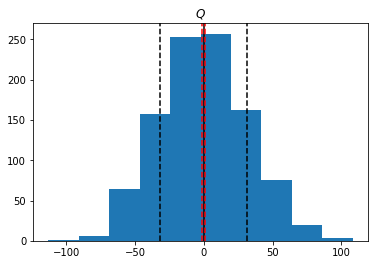

In [190]:
Q=(X-mu)/(sigma/np.sqrt(X.size))
plt.hist(Q);
plt.axvline(0,color='k')
plt.axvline(1,color='r',ls='dashed')
plt.axvline(-1,color='r',ls='dashed')
plt.axvline(np.sqrt(Q.size),color='k',ls='dashed')
plt.axvline(-np.sqrt(Q.size),color='k',ls='dashed')
plt.title('$Q$');

$$
P([-z_{\alpha/2},z_{\alpha/2}])=1-\alpha$$


```stats.norm.interval(``` $1-\alpha$ ```, loc=``` $E[X]$ ```, scale=``` $\sqrt{V[X]}$ ```)```


### $1\sigma$ interval
su upravo vrijednosti $Q\in[-1,1]$

In [191]:

z_alphahalf=stats.norm.interval(.6827,loc=0, scale=1)
z_alphahalf

(-1.0000217133229992, 1.0000217133229992)

Za $X$

In [192]:
stats.norm.interval(.6827,loc=mu, scale=sigma/np.sqrt(X.size))

(0.9602280371680532, 0.9928605724469546)

Ove brojke su upravo

In [193]:
mu-sigma/np.sqrt(X.size),mu-sigma/np.sqrt(X.size)

(0.9602283914407501, 0.9602283914407501)

### $2\sigma$ interval
su upravo vrijednosti $Q\in[-2,2]$

In [194]:
from scipy import stats
z_alphahalf=stats.norm.interval(.9545,loc=0, scale=1)
z_alphahalf

(-2.0000024438996036, 2.0000024438996027)

In [195]:
stats.norm.interval(.9545,loc=mu, scale=sigma/np.sqrt(X.size))

(0.9439124381995421, 1.0091761714154657)

Ove brojke su upravo

In [196]:
mu-2*sigma/np.sqrt(X.size),mu-2*sigma/np.sqrt(X.size)

(0.9439124780739964, 0.9439124780739964)

In [294]:
stats.norm.interval(1-3.4*10**(-9),)

(-5.9110179408484305, 5.911017946226466)

## Slučaj nepoznate varijance
Za velike uzorke znamo da je $V[X]\approx \sigma^2$. Za male uzorke ne možemo tvrditi da poznajemo varijancu $\sigma$, već samo njezinu ocjenu
$$
S^2 = \frac{1}{n-1}\sum\limits_i(X-\bar X)^2.
$$
Definiramo omjer $(\bar X-\mu)/\sqrt{\sigma^2/n}$, gdje ne poznajemo $\sigma$ i varijable $(n-1)S^2/\sigma^2$.
$$
Q=\frac{\frac{\bar X-\mu}{\sqrt{\sigma^2/n}}}{\frac{(n-1)S^2}{\sigma^2}}=\frac{\bar X-\mu}{\sqrt{\frac{S^2}{n}}}.
$$
Način računa je identičan, samo što je ovaj put $Q$ distribuiran po $t$ distribuciji s $n-1$ stupnjem slobode, t.j.
$$
Q\sim t(n-1),
$$
gdje je $t$ Studentova t-distribucija.
Tada je interval pouzdanosti
$$
[\bar X-\frac{s}{\sqrt{n}}t_{\alpha/2}(n-1),\bar X+\frac{s}{\sqrt{n}}t_{\alpha/2}(n-1)]
$$

Text(0.5,1,'t distribucija')

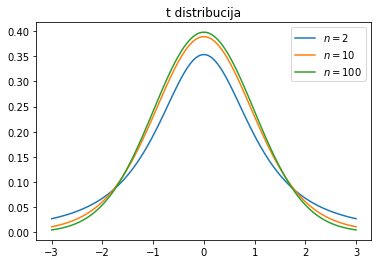

In [271]:

plt.plot(np.linspace(-3,3,100),stats.t.pdf(np.linspace(-3,3,100),2),label="$n=2$")
plt.plot(np.linspace(-3,3,100),stats.t.pdf(np.linspace(-3,3,100),10),label="$n=10$")
plt.plot(np.linspace(-3,3,100),stats.t.pdf(np.linspace(-3,3,100),100),label="$n=100$")
plt.legend()
plt.title("t distribucija")

Uzmimo uzorak od $n=9$, $\bar X=5$. 


(2.622370060596642, 8.139224687717103, 2.713074895905701)

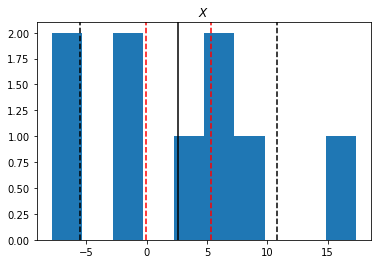

In [295]:
X = np.random.normal(5,6,9)
mu    = np.mean(X)
sigma = np.std(X,ddof=1)
plt.hist(X,10);
plt.axvline(mu,color='k')
plt.axvline(mu-sigma,color='k',ls='dashed')
plt.axvline(mu+sigma,color='k',ls='dashed')
plt.axvline(mu-sigma/np.sqrt(X.size),color='r',ls='dashed')
plt.axvline(mu+sigma/np.sqrt(X.size),color='r',ls='dashed')
plt.title('$X$')
mu, sigma, sigma/np.sqrt(X.size)

95% interval je dan s $[-t_{\alpha/2}(n-1),t_{\alpha/2}(n-1)]$

In [224]:
stats.t.interval(0.95,8)

(-2.3060041350333704, 2.3060041350333704)

In [231]:
np.array(stats.t.interval(0.95,X.size-1))*sigma/np.sqrt(X.size)+5 #jer je mu=5 poznat

array([0.26998062, 9.73001938])

Kako se ponaša distribucija za veliki $N$?

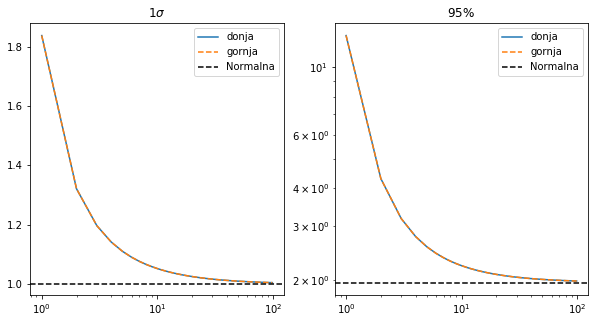

In [260]:

f,axs = plt.subplots(1,2,figsize=(10,5))
ax = axs[0]
ax.plot(np.arange(1,100),-stats.t.interval(.6827,np.arange(1,100))[0],label="donja")
ax.plot(np.arange(1,100), stats.t.interval(.6827,np.arange(1,100))[1],label="gornja",ls="dashed")
ax.axhline(stats.norm.interval(.6827)[1],color="k",ls="dashed",label="Normalna")
ax.set_xscale("log")
ax.legend()
ax.set_title(r"$1\sigma$")
ax = axs[1]
ax.plot(np.arange(1,100),-stats.t.interval(0.95,np.arange(1,100))[0],label="donja")
ax.plot(np.arange(1,100), stats.t.interval(0.95,np.arange(1,100))[1],label="gornja",ls="dashed")
ax.axhline(stats.norm.interval(0.95)[1],color="k",ls="dashed",label="Normalna")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
ax.set_title(r"$95\%$");

## Procjena varijance
Za procjenu varijance kao pivotal veličinu uzimamo $\chi^2$ vrijednost
$$
Q=\sum\limits_i\left(\frac{X_i-\mu}{\sigma}\right)^2
$$
Znamo da ova veličina prati $\chi^2$ distribuciju te je tada interval pouzdanosti za $\sigma^2$ jednak
$$
[\frac{\sum\limits_i(X_i-\mu)^2}{\chi^2_{1-\alpha/2}(n)},\frac{\sum\limits_i(X_i-\mu)^2}{\chi^2_{\alpha/2}(n)}]
$$

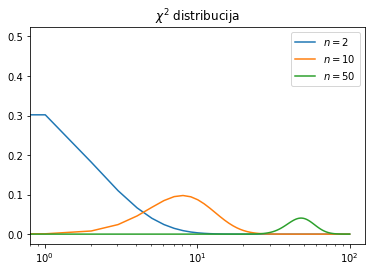

In [278]:
plt.plot(np.linspace(0,100,100),stats.chi2.pdf(np.linspace(0,100,100),2),label="$n=2$")
plt.plot(np.linspace(0,100,100),stats.chi2.pdf(np.linspace(0,100,100),10),label="$n=10$")
plt.plot(np.linspace(0,100,100),stats.chi2.pdf(np.linspace(0,100,100),50),label="$n=50$")
plt.legend()
plt.title("$\chi^2$ distribucija")
plt.xscale("log")

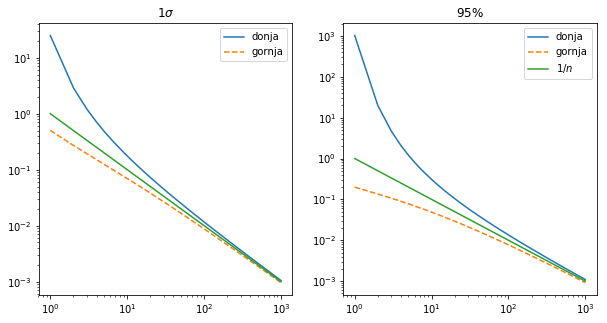

In [299]:
f,axs = plt.subplots(1,2,figsize=(10,5))
ax = axs[0]
N = np.arange(1,1000)
ax.plot(N, 1/stats.chi2.interval(.6827,N)[0],label="donja")
ax.plot(N, 1/stats.chi2.interval(.6827,N)[1],label="gornja",ls="dashed")
ax.set_xscale("log")
ax.legend()
ax.set_yscale("log")
ax.set_title(r"$1\sigma$")
ax.plot(N,1/N,label="$1/n$")
ax = axs[1]
ax.plot(N,1/stats.chi2.interval(0.95,N)[0],label="donja")
ax.plot(N, 1/stats.chi2.interval(0.95,N)[1],label="gornja",ls="dashed")
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(N,1/N,label="$1/n$")

ax.legend()
ax.set_title(r"$95\%$");

1. Zadan je uzorak od 9 elemenata, srednje vrijednosti 5. Te je V[X] = 36. Izračunati interval pouzdanosti od srednje vrijednosti

In [300]:
np.array(stats.t.interval(0.68,9-1))*6/np.sqrt(9)+5

array([2.87955199, 7.12044801])

In [301]:
stats.t.interval(0.68,9-1,loc=5,scale=6/np.sqrt(9))

(2.8795519949403685, 7.1204480050596315)

Dan je uzorak. Izračunati interval pouzdanosti za srednju vrijednost i standardnu devijaciju


In [303]:
X=np.array([1.,0.7,1.2,.5,-.1,1.1,2.,1.2,1.2,0.3,0.2,0.12,0.44,0.44,0.12])

(array([1., 4., 3., 1., 0., 2., 3., 0., 0., 1.]),
 array([-0.1 ,  0.11,  0.32,  0.53,  0.74,  0.95,  1.16,  1.37,  1.58,
         1.79,  2.  ]),
 <a list of 10 Patch objects>)

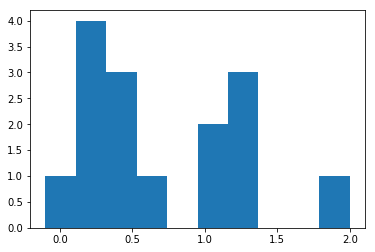

In [305]:
plt.hist(X)

In [310]:
np.mean(X),np.std(X,ddof=1), np.std(X,ddof=1)/np.sqrt(X.size)

(0.6946666666666664, 0.5724367297123844, 0.1478025280622334)

Interval od $\bar X$

In [311]:
stats.t.interval(0.9,X.size-1,loc=np.mean(X),scale=np.std(X,ddof=1)/np.sqrt(X.size))

(0.4343405758975071, 0.9549927574358257)

Interval od $\sigma^2$

In [317]:
X.size*np.std(X)**2/np.array(stats.chi2.interval(.90,X.size))

array([0.63181501, 0.18353384])

In [318]:
np.sqrt(X.size*np.std(X)**2/np.array(stats.chi2.interval(.90,X.size)))

array([0.79486792, 0.4284085 ])

In [315]:
np.sum((X-np.mean(X))**2)

4.587573333333332

In [316]:
np.std(X)*np.sqrt(X.size)

2.1418621181890614

In [319]:
import scipy.stats as sc
import matplotlib.pyplot as plt
import numpy as np


Naplotati normalnu distribuciju [-3,3] sa srednjom vrijednosti 1 i std 0.5.

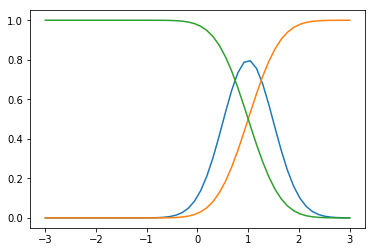

In [328]:
X=np.linspace(-3,3)
plt.plot(X,sc.norm.pdf(np.linspace(-3,3),loc=1,scale=(0.5)))
plt.plot(X,sc.norm.cdf(np.linspace(-3,3),loc=1,scale=(0.5)))
plt.plot(X,sc.norm.sf(np.linspace(-3,3),loc=1,scale=(0.5)))

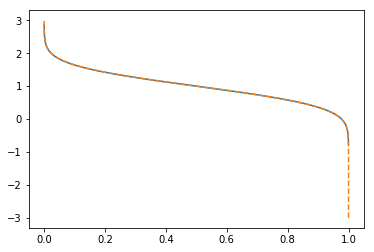

In [340]:
X=np.linspace(-1,1,10000)
plt.plot(X,sc.norm.isf(X,loc=1,scale=(0.5)))
plt.plot(sc.norm.sf(np.linspace(-3,3),loc=1,scale=(0.5)),np.linspace(-3,3),ls='dashed')

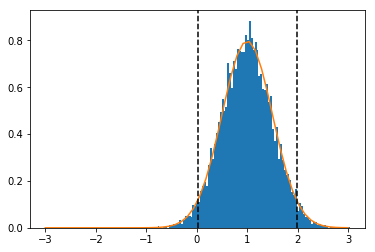

In [382]:
X=np.linspace(-3,3)
plt.hist(1+0.5*sc.norm.isf(1-np.random.uniform(0,1,10000)),100,normed=True);
plt.plot(X,sc.norm.pdf(X,loc=1,scale=0.5))
Y=sc.norm.interval(0.95,loc=1,scale=0.5)
plt.axvline(Y[0], color='k',ls='dashed')
plt.axvline(Y[1], color='k',ls='dashed')

(array([0.02808737, 0.08827458, 0.07222466, 0.07623714, 0.07222466,
        0.04012481, 0.00802496, 0.00401248, 0.00401248, 0.00802496]),
 array([ 2.25235569,  4.74457943,  7.23680317,  9.72902691, 12.22125065,
        14.71347439, 17.20569813, 19.69792187, 22.19014561, 24.68236935,
        27.17459309]),
 <a list of 10 Patch objects>)

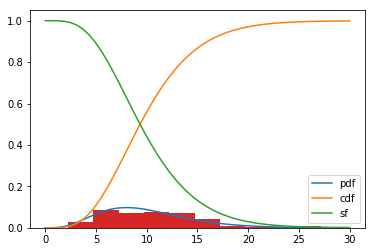

In [381]:
X=np.linspace(0,30)
plt.plot(X,sc.chi2.pdf(X,df=10),label='pdf')
plt.plot(X,sc.chi2.cdf(X,df=10),label='cdf')
plt.plot(X,sc.chi2.sf(X,df=10),label='sf')
plt.legend()
plt.hist(np.random.chisquare(10,100),normed=True)

6.25

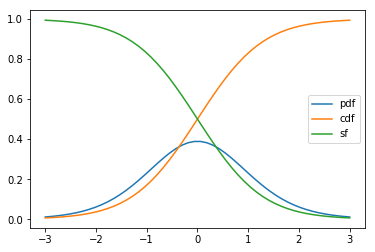

In [369]:
X=np.linspace(-3,3)
plt.plot(X,sc.t.pdf(X,df=10),label='pdf')
plt.plot(X,sc.t.cdf(X,df=10),label='cdf')
plt.plot(X,sc.t.sf(X,df=10),label='sf')
plt.legend()
sc.t.moment(4,df=10)

In [370]:
sc.norm.moment(4)

3.0

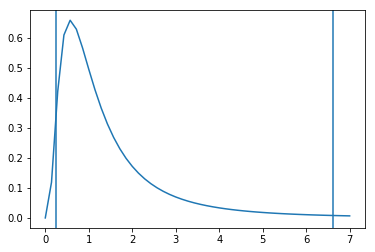

In [378]:
X=np.linspace(0,7)
plt.plot(X,sc.f.pdf(X,10,5))
Y=sc.f.interval(0.95,10,5)
plt.axvline(Y[0])
plt.axvline(Y[1])

In [405]:
sc.kstest(np.random.normal(loc=0,scale=0.5,size=100),'norm')

KstestResult(statistic=0.13309903580277874, pvalue=0.05259271689471629)

In [408]:
sc.kstest(np.random.chisquare(2,1000),"norm")

KstestResult(statistic=0.5010797351252866, pvalue=9.038843672056453e-233)

In [410]:
sc.skewtest(np.random.normal(loc=0,scale=0.5,size=100),)

SkewtestResult(statistic=-0.17747347304193276, pvalue=0.859136499922677)

In [411]:
sc.skewtest(np.random.chisquare(2,1000))

SkewtestResult(statistic=17.197601310863632, pvalue=2.7675332837765373e-66)